### A Look at the Data

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset. First, let's read in the data and necessary libraries.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import os
import json

pd.options.display.max_colwidth=200
%matplotlib inline

In [20]:
# data directory
data_dir = "../data"
raw_data = os.path.join(data_dir, "raw")

In [21]:
df = pd.read_csv(os.path.join(raw_data, "summary_listings.csv"))

In [22]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 16 columns):
id                                48864 non-null int64
name                              48848 non-null object
host_id                           48864 non-null int64
host_name                         48846 non-null object
neighbourhood_group               48864 non-null object
neighbourhood                     48864 non-null object
latitude                          48864 non-null float64
longitude                         48864 non-null float64
room_type                         48864 non-null object
price                             48864 non-null int64
minimum_nights                    48864 non-null int64
number_of_reviews                 48864 non-null int64
last_review                       38733 non-null object
reviews_per_month                 38733 non-null float64
calculated_host_listings_count    48864 non-null int64
availability_365                  48864 non-null int64

In [23]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127


In [26]:
len(list(df.neighbourhood.unique()))

222

## Explore geojson data

In [1]:
!python --version

Python 3.7.3


In [27]:
import geopandas

In [28]:
nbhoods = geopandas.read_file('../data/raw/neighbourhoods.geojson')

In [29]:
nbhoods.shape

(233, 3)

In [30]:
len(nbhoods.neighbourhood.unique())

230

In [4]:
nbhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"(POLYGON ((-73.76670799999999 40.614911, -73.7..."
1,Allerton,Bronx,"(POLYGON ((-73.848597 40.87167, -73.845823 40...."
2,City Island,Bronx,"(POLYGON ((-73.782822 40.843919, -73.782572 40..."
3,Ditmars Steinway,Queens,"(POLYGON ((-73.90160299999999 40.76777, -73.90..."
4,Ozone Park,Queens,"(POLYGON ((-73.83754399999999 40.691364, -73.8..."


In [17]:
type(nbhoods)

geopandas.geodataframe.GeoDataFrame

<Figure size 432x288 with 0 Axes>

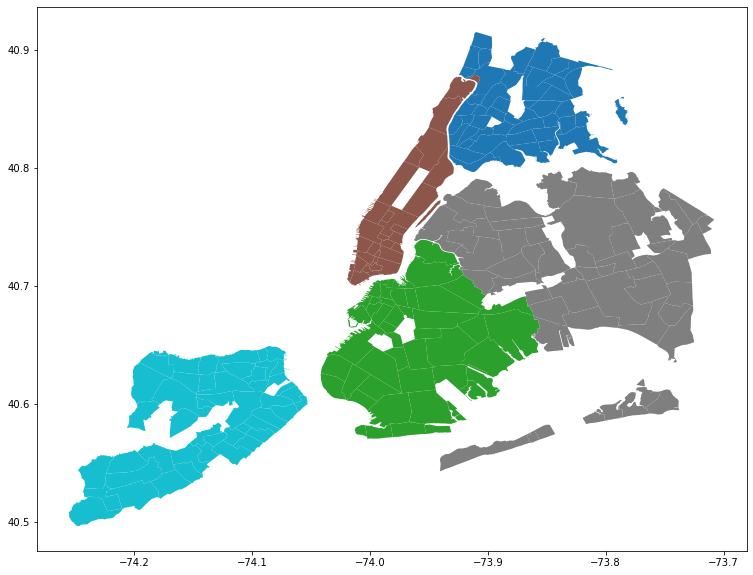

In [31]:
plt.figure()
nbhoods.plot(figsize=(20, 10), column='neighbourhood_group')
plt.show()

In [13]:
nbhoods.neighbourhood_group.value_counts()

Queens           55
Bronx            50
Brooklyn         48
Staten Island    48
Manhattan        32
Name: neighbourhood_group, dtype: int64

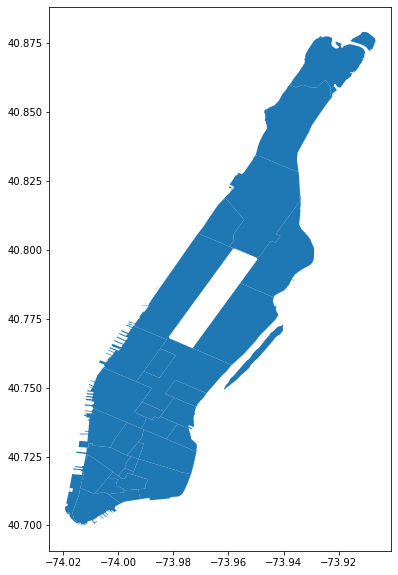

In [16]:
nbhoods[nbhoods.neighbourhood_group == "Manhattan"].plot(figsize=(20,10))

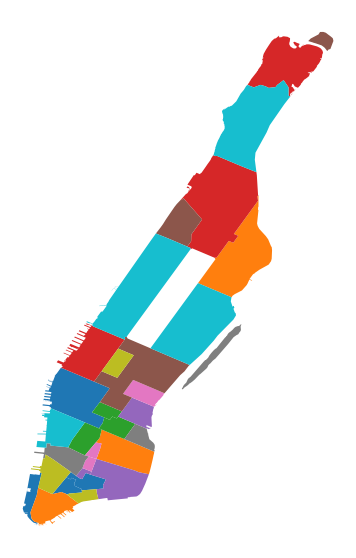

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
nbhoods[nbhoods.neighbourhood_group == "Manhattan"].plot(ax=ax, figsize=(20,10), column='neighbourhood')
ax.set_axis_off()